# Script python de jeu de données KLEY

In [ ]:
# importation de les librairies necessaire pour le jeu de donees
import pandas as pd
import numpy as np

In [166]:

def KLEY_DATA(Nombres_residences=22, Nombres_etudiants=5000, Nombre_ecoles=900):#informations via le site web KLEY
    #creation DATAFRAME des residences KLEY
    residences = pd.DataFrame({
        'ID_residence': np.arange(1, Nombres_residences + 1),
        'Nom_Residence': ['KLEY Residence ' + str(i) for i in range(1, Nombres_residences + 1)],
        'Capacite': np.random.randint(150, 300, Nombres_residences),  # j'ai sugerrer que la capacite d'une residence est entre 150 et 300
        'taux_occupation': np.random.uniform(0.5, 1.0, Nombres_residences),
        'region':np.random.choice(['brest','paris','marseille','toulouse','saclay','rouen','reims','montpelier','angers','Rennes','champs','çaen','cergy'],Nombres_residences)
    #j'ai sugerrer que le taux d'occupation est entre 50% et 100% 
    })
    
    #Creation Dataframe des ecoles
    ecoles = pd.DataFrame({
        'ID_ecole': np.arange(1, Nombre_ecoles + 1),
        'nom-ecole': ['ecole ' + str(i) for i in range(1, Nombre_ecoles + 1)],
        'type_ecole': np.random.choice(['Prive', 'publique'], Nombre_ecoles),
        'Programme': np.random.choice(['Universite', 'ecole specialise', 'ecole buisniess', 'IUT', 'BTS'], Nombre_ecoles)
    })
    
    # Creaation datafram pour les etudiants
    etudiants = pd.DataFrame({
        'ID_etudiant': np.arange(1, Nombres_etudiants + 1),
        'Age': np.random.normal(21, 2, Nombres_etudiants).astype(int),  #moyenne d'age 21 ans
        'ID_ecole': np.random.choice(ecoles['ID_ecole'], Nombres_etudiants),
        'ID-residence': np.random.choice(residences['ID_residence'], Nombres_etudiants),
        'type_logement': np.random.choice(['Individuel', 'colocation'], Nombres_etudiants),
        'pieces_logement': np.random.choice(['KOCOON(T1)', 'KOCOON L', 'KOCOON XL(T2)', 'KABAN(T3)','KASA(T6)'], Nombres_etudiants),
        'service_plus_consomme':np.random.choice(['Menage','Buanderie','Distributeurs automatiques','Kit linge','Acadomia','Paniers de fruits et légumes','Parking voiture','Foodtruck','Petit-déjeuner et pains frais'],Nombres_etudiants)
    })
    # Calcule de revenue de chaque residence
    residences['Revenue'] = residences['Capacite'] * np.random.randint(800, 1200, Nombres_residences) 
    # definire l'ecole ou l'universite la plus proche de residence
    residences['ecole_la_plus_proche']= np.random.choice(ecoles['nom-ecole'], Nombres_residences)
    
    date_arivee=pd.date_range(start='2024-05-01',end='2024-09-30',periods=len(etudiants))
    date_depart=pd.date_range(start='2024-10-01',end='2025-04-30',periods=len(etudiants))
    etudiants ['Date arive']=date_arivee.date
    etudiants ['Date depart prevu']=date_depart.date
    

    

    
    
    return residences, ecoles, etudiants



In [167]:
residences_data, ecoles_data, etudiants_data = KLEY_DATA()

In [168]:
residences_data.head()

,ID_residence,Nom_Residence,Capacite,taux_occupation,region,Revenue,ecole_la_plus_proche
0,1,KLEY Residence 1,157,0.969231,reims,152290,ecole 745
1,2,KLEY Residence 2,224,0.999551,paris,201152,ecole 758
2,3,KLEY Residence 3,178,0.896140,paris,152546,ecole 548
3,4,KLEY Residence 4,245,0.602414,reims,213150,ecole 212
4,5,KLEY Residence 5,255,0.888073,brest,290700,ecole 127


In [169]:
ecoles_data.head()

,ID_ecole,nom-ecole,type_ecole,Programme
0,1,ecole 1,Prive,BTS
1,2,ecole 2,Prive,IUT
2,3,ecole 3,Prive,Universite
3,4,ecole 4,publique,ecole buisniess
4,5,ecole 5,publique,IUT


In [170]:
etudiants_data.head()

,ID_etudiant,Age,ID_ecole,ID-residence,type_logement,pieces_logement,service_plus_consomme,Date arive,Date depart prevu
0,1,21,148,10,colocation,KOCOON(T1),Foodtruck,2024-05-01,2024-10-01
1,2,21,777,22,colocation,KOCOON L,Menage,2024-05-01,2024-10-01
2,3,19,237,8,Individuel,KOCOON(T1),Parking voiture,2024-05-01,2024-10-01
3,4,24,643,17,colocation,KASA(T6),Paniers de fruits et légumes,2024-05-01,2024-10-01
4,5,22,171,21,Individuel,KABAN(T3),Buanderie,2024-05-01,2024-10-01


In [183]:
# Trouver la résidence qui génère le meilleur revenu
residence_meilleur_revenu = residences_data.loc[residences_data['Revenue'].idxmax()]
# Identifier le service payant le plus consommé par les étudiants
Type_logement = etudiants_data['pieces_logement'].value_counts().idxmax()
service_plus_consomme = etudiants_data['service_plus_consomme'].value_counts().idxmax()
print("\nRésidence générant le meilleur revenu :\n", residence_meilleur_revenu)
print("\ntype de logement le plus occupe :", Type_logement)
print("\nle service payant plus consomme dans les residence KLEY est  :", service_plus_consomme)


Résidence générant le meilleur revenu :
 ID_residence                           6
Nom_Residence           KLEY Residence 6
Capacite                             285
taux_occupation                 0.989508
region                             paris
Revenue                           316065
ecole_la_plus_proche           ecole 136
Name: 5, dtype: object

type de logement le plus occupe : KABAN(T3)

le service payant plus consomme dans les residence KLEY est  : Kit linge


# Création du tableau de board avec seaborn de python

In [184]:
#importation des librairies necessaire pour le Dashboard
import matplotlib.pyplot as plt

import seaborn as sns


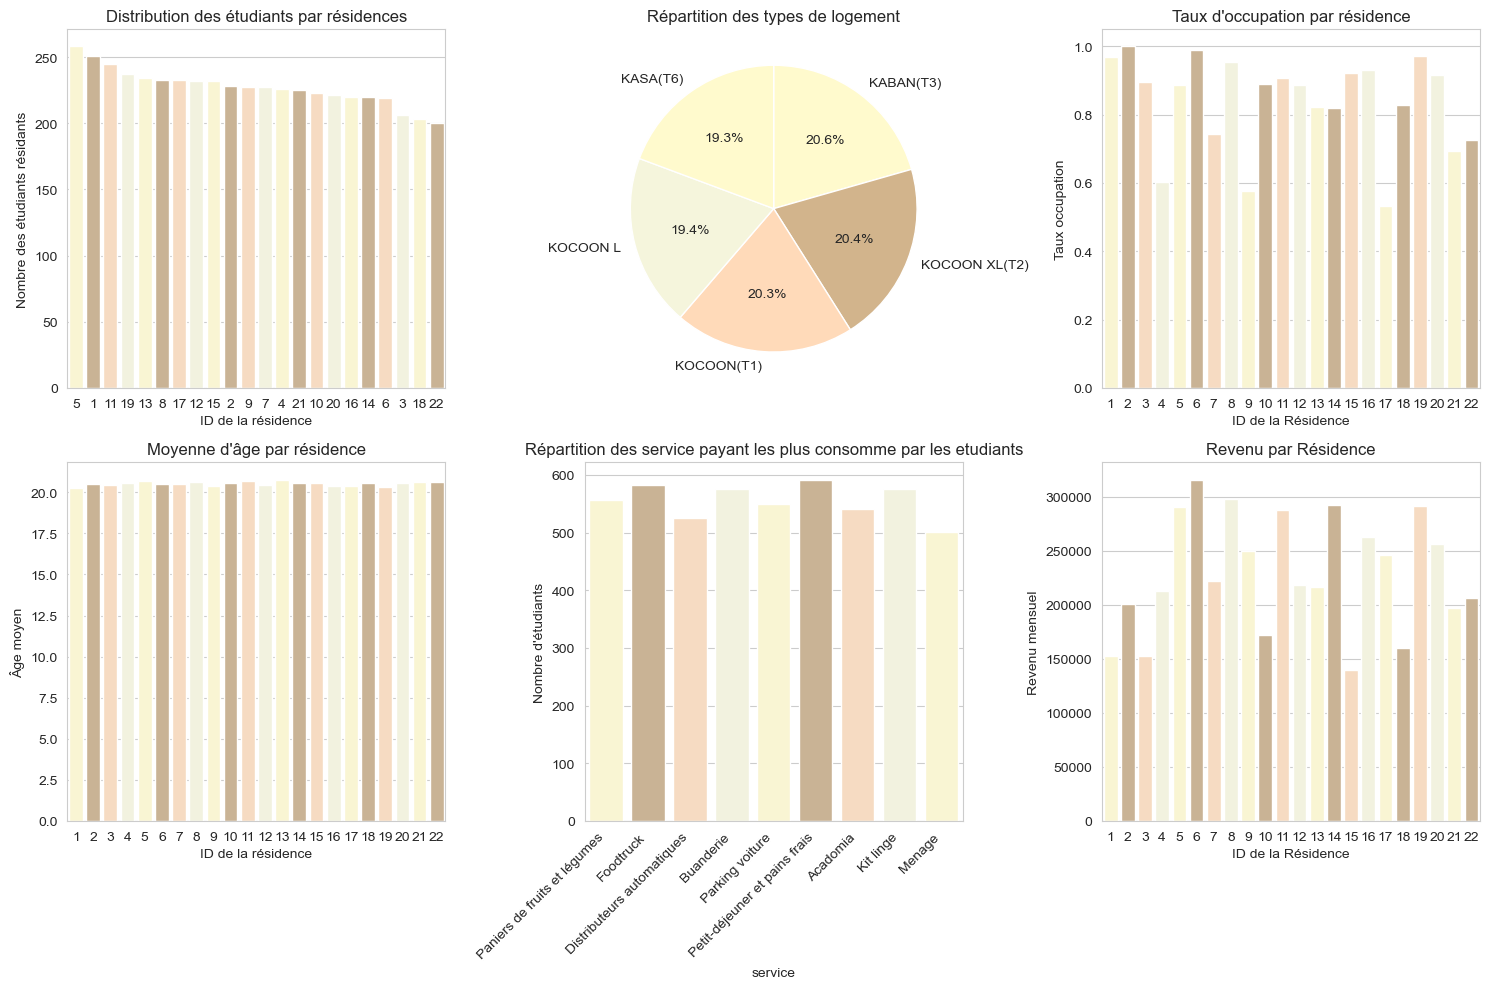

In [195]:

sns.set_style('whitegrid')
custom_palette = ["#FFFACD", "#D2B48C", "#FFDAB9", "#F5F5DC"]

sns.set_palette(custom_palette)

plt.figure(figsize=(15, 10))

# Subplot 1: Distribution des étudiants par résidences
plt.subplot(2, 3, 1)
sns.countplot(data=etudiants_data, x='ID-residence', order=etudiants_data['ID-residence'].value_counts().index, palette=custom_palette)
plt.title('Distribution des étudiants par résidences')
plt.xlabel('ID de la résidence')
plt.ylabel('Nombre des étudiants résidants')

# Subplot 2: Taux d'occupation par résidence
plt.subplot(2, 3, 3)
sns.barplot(data=residences_data, x='ID_residence', y='taux_occupation', palette=custom_palette)
plt.title('Taux d\'occupation par résidence')
plt.xlabel('ID de la Résidence')
plt.ylabel('Taux occupation')
#subplot 3 : repartition de type des logements
plt.subplot(2, 3, 2)
counts = etudiants['pieces_logement'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des types de logement')
# Subplot 4
plt.subplot(2, 3, 5)
sns.countplot(data=etudiants, x='service_plus_consomme',palette=custom_palette)


plt.title('Répartition des service payant les plus consomme par les etudiants')
plt.xlabel('service')
plt.ylabel('Nombre d\'étudiants')

# Faire pivoter les étiquettes sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')



# Subplot 5: Âge moyen par résidence
plt.subplot(2, 3, 4)
avg_age_per_residence = etudiants_data.groupby('ID-residence')['Age'].mean().reset_index()
sns.barplot(data=avg_age_per_residence, x='ID-residence', y='Age', palette=custom_palette)
plt.title('Moyenne d\'âge par résidence')
plt.xlabel('ID de la résidence')
plt.ylabel('Âge moyen')

# Subplot  6: Revenu par résidence
plt.subplot(2, 3, 6)
sns.barplot(data=residences_data, x='ID_residence', y='Revenue', palette=custom_palette)
plt.title('Revenu par Résidence')
plt.xlabel('ID de la Résidence')
plt.ylabel('Revenu mensuel')

plt.savefig('Tableau de board KLEY.png')

plt.tight_layout()

plt.show()


